In [1]:
# inline plotting instead of popping out
%matplotlib inline

import os
import numpy as np # numpy  1.17.1
import pandas as pd # pandas  0.25.1
import matplotlib.pyplot as plt # matplotlib 3.1.1
import seaborn as sns # seaborn 0.9.0
from sklearn.preprocessing import StandardScaler # scikit-learn 0.21.3

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header = None)

df.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]

X = df.drop('Class label', 1)
y = df['Class label']

df.head()

C:\Users\acer\AppData\Local\Temp/ipykernel_4016/4141229279.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('Class label', 1)


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


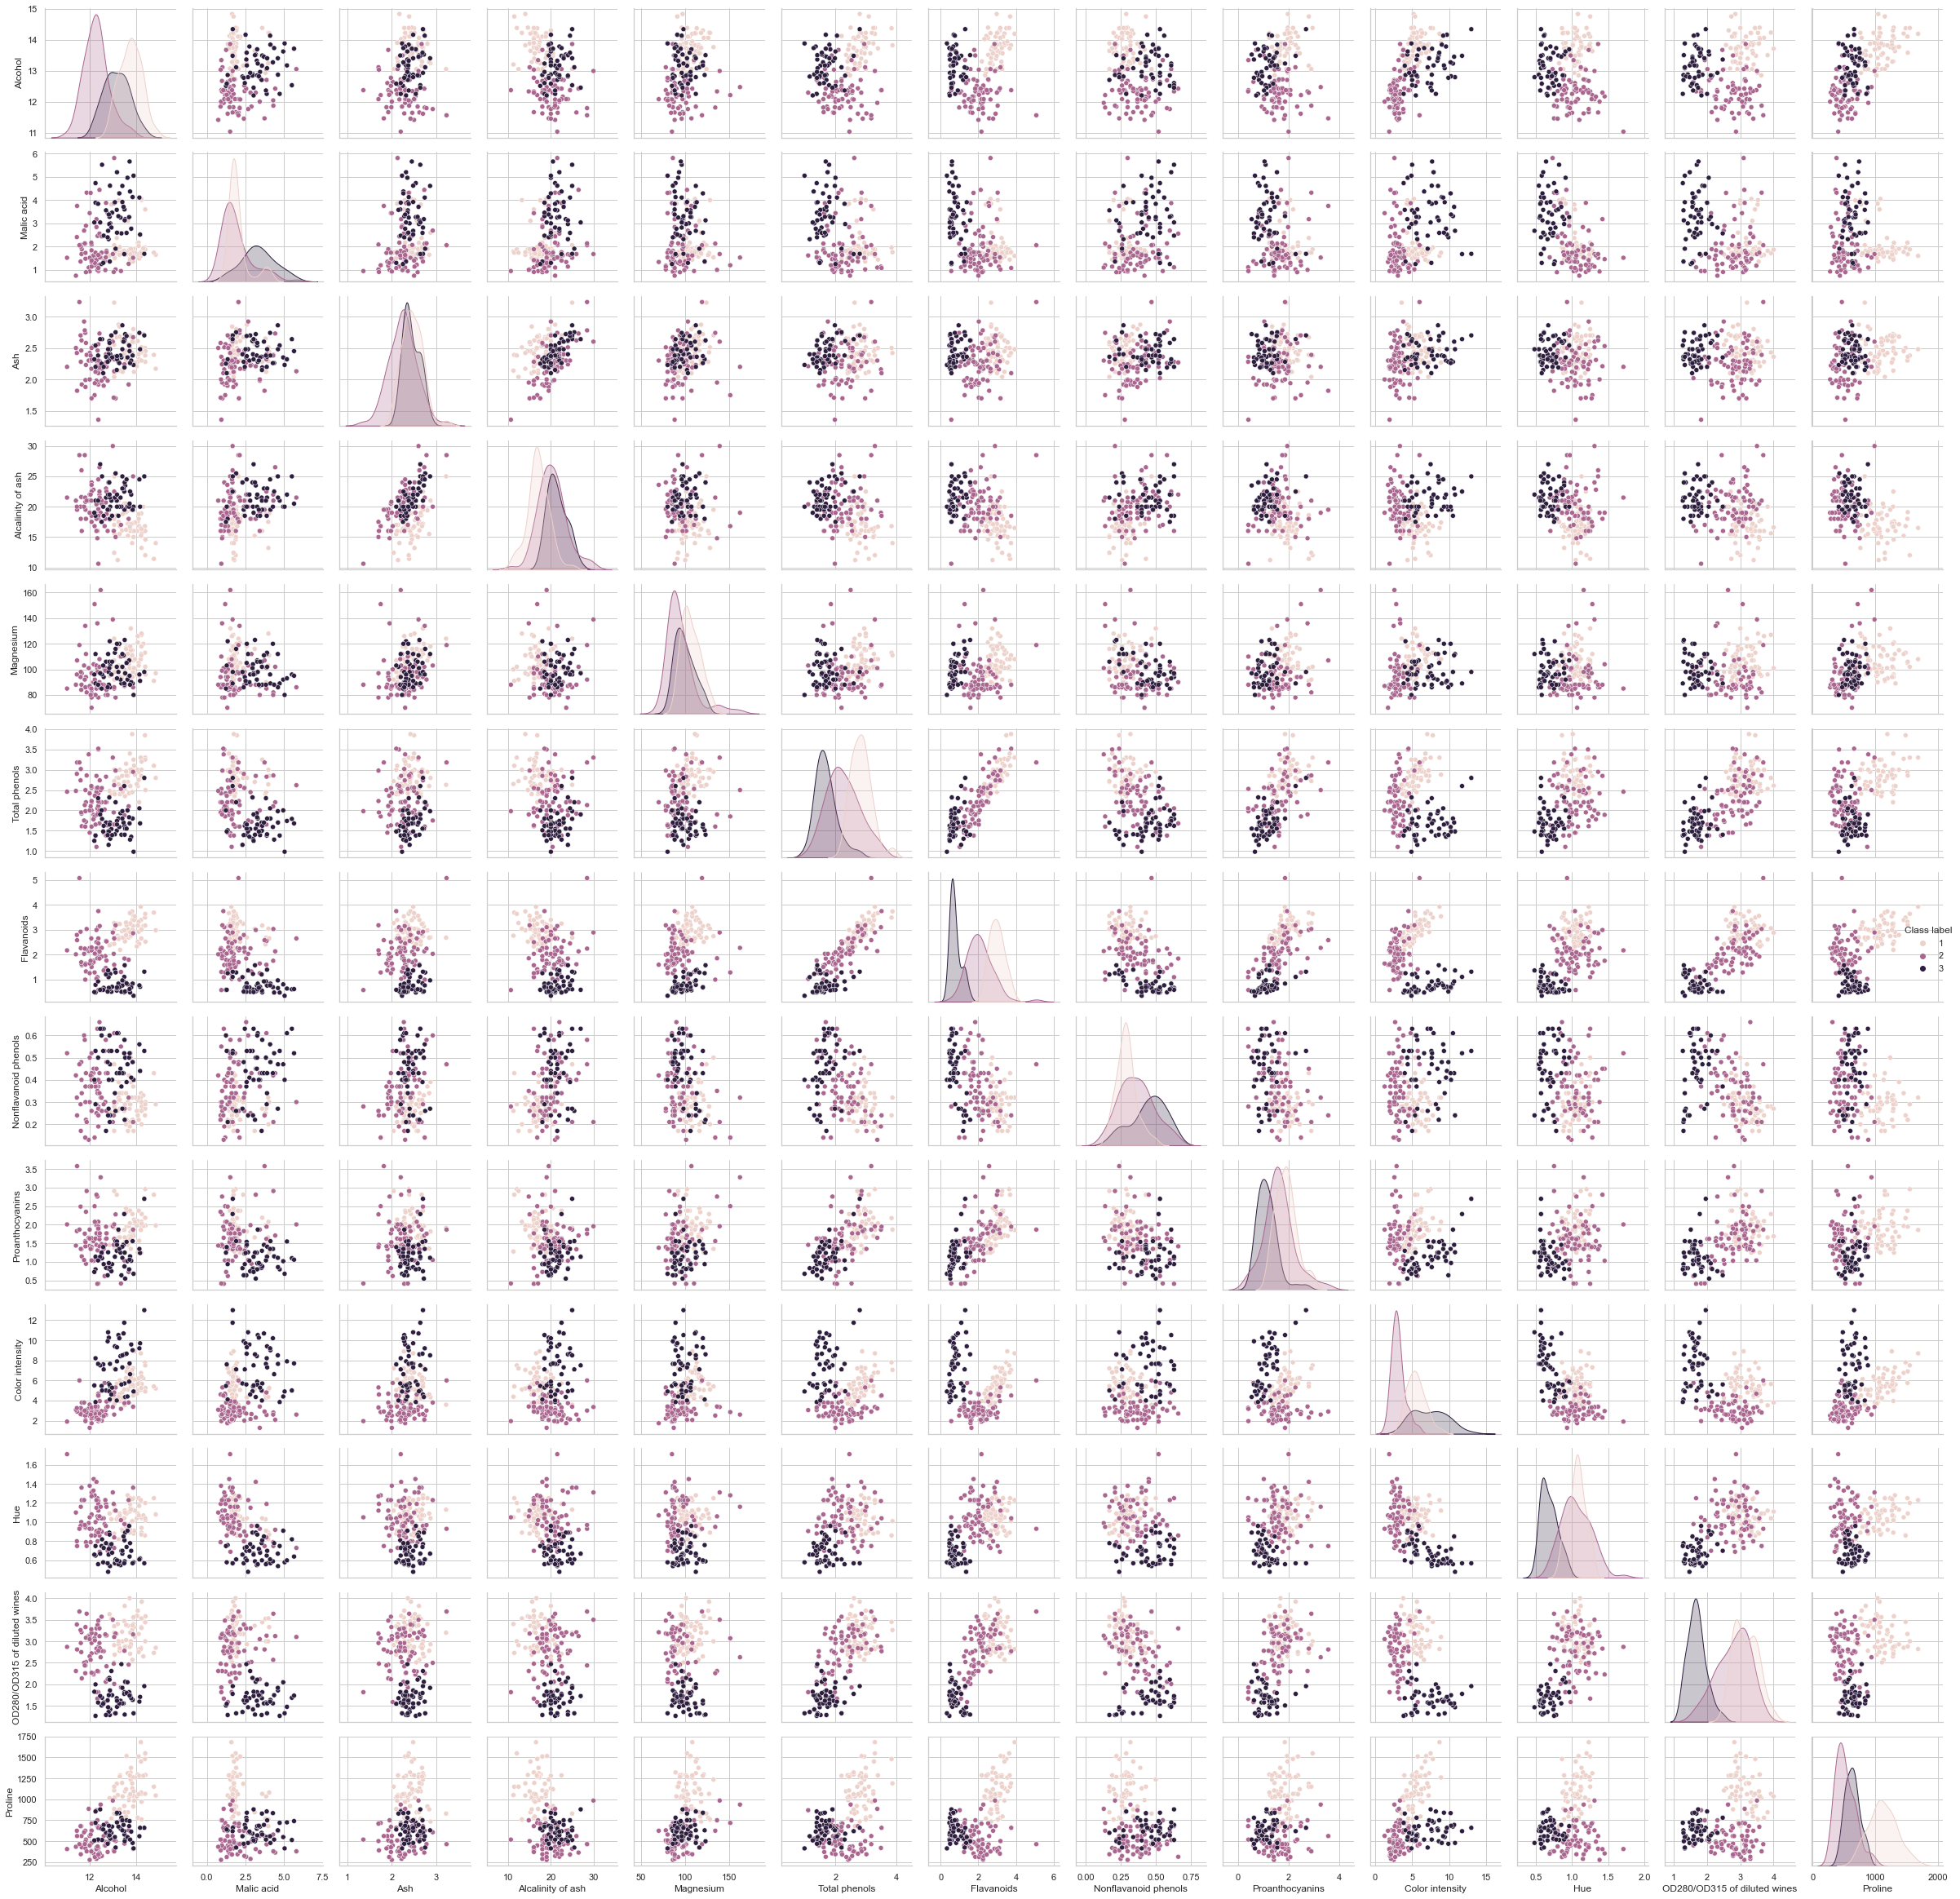

In [3]:
sns.set(style = 'whitegrid', context = 'notebook')

sns.pairplot(df, vars = df.columns[1 :], hue = "Class label", height = 2.5)
plt.tight_layout()

if not os.path.exists('./output'):
    os.makedirs('./output')
plt.savefig('./output/fig-wine-scatter.png', dpi = 300)
plt.show()

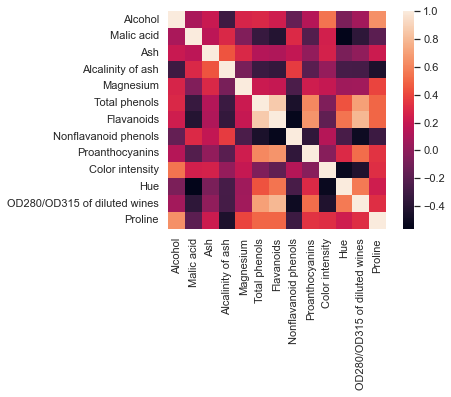

<Figure size 720x576 with 0 Axes>

In [11]:
# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df.shape[0]

sns.set(font_scale=1.0)

ticklabels = [s for s in X.columns]

hm = sns.heatmap(
    R,
    cbar = True,
    square = True,
    yticklabels = ticklabels,
    xticklabels = ticklabels
)

plt.figure(figsize=(10, 8))
plt.tight_layout()
plt.savefig('./output/fig-wine-corr.png', dpi = 300)
plt.show()

sns.reset_orig()

In [5]:
eigen_vals, eigen_vecs = np.linalg.eigh(R)

print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.10337794 0.16877023 0.22578864 0.25090248 0.28887994 0.34849736
 0.55102831 0.64165703 0.85322818 0.91897392 1.44607197 2.49697373
 4.70585025]


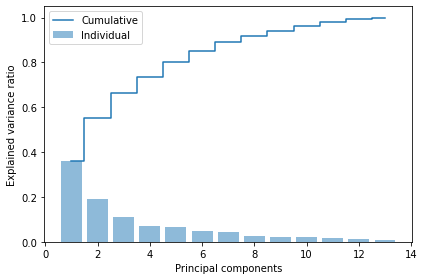

In [6]:
tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./output/fig-pca-var-exp.png', dpi=300)
plt.show()

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

In [8]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Projection matrix W:\n', W)

Projection matrix W:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


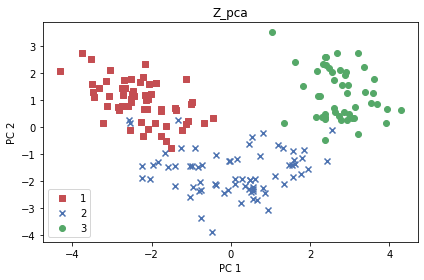

In [9]:
Z_pca = Z.dot(W)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_pca[y.values==l, 0], 
                Z_pca[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('./output/fig-pca-z.png', dpi=300)
plt.show()

In [10]:
np.save('./output/Z_pca.npy', Z_pca)